In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ushape/ushape.csv


In [39]:
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('/kaggle/input/ushape/ushape.csv',header=None,names=["X","Y","class"])

In [41]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


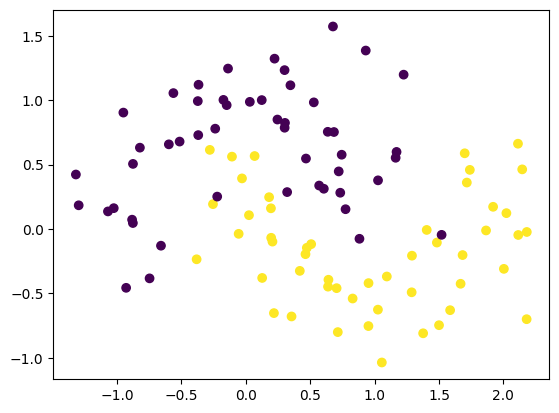

In [42]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [43]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [44]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [45]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.get_weights()

[array([[ 0.6962024,  0.4286729],
        [ 0.7296536, -0.8057747]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.23991942],
        [0.92945206]], dtype=float32),
 array([0.], dtype=float32)]

In [47]:
initial_weights = model.get_weights()

In [48]:
initial_weights[0]=np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1]=np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2]=np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3]=np.ones(model.get_weights()[3].shape)*0.5

In [49]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [50]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.5078 - loss: 0.8529 - val_accuracy: 0.5000 - val_loss: 0.8362
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5156 - loss: 0.8437 - val_accuracy: 0.5000 - val_loss: 0.8340
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5312 - loss: 0.8238 - val_accuracy: 0.5000 - val_loss: 0.8319
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5156 - loss: 0.8397 - val_accuracy: 0.5000 - val_loss: 0.8298
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4922 - loss: 0.8627 - val_accuracy: 0.5000 - val_loss: 0.8277
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5234 - loss: 0.8239 - val_accuracy: 0.5000 - val_loss: 0.8257
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5273 - loss: 0.8164 - val_accuracy: 0.5000 - val_loss: 0.8237
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5000 - loss: 0.8499 - val_accuracy: 0.5000 - val_loss:

In [52]:
model.get_weights()

[array([[0.70909417, 0.70909417],
        [0.24620296, 0.24620296]], dtype=float32),
 array([0.27460515, 0.27460515], dtype=float32),
 array([[0.26572144],
        [0.26572144]], dtype=float32),
 array([0.25166747], dtype=float32)]

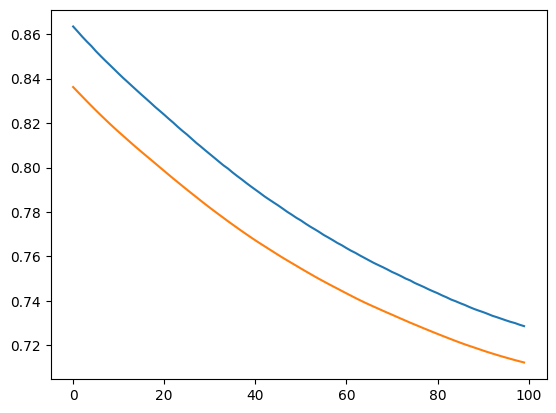

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

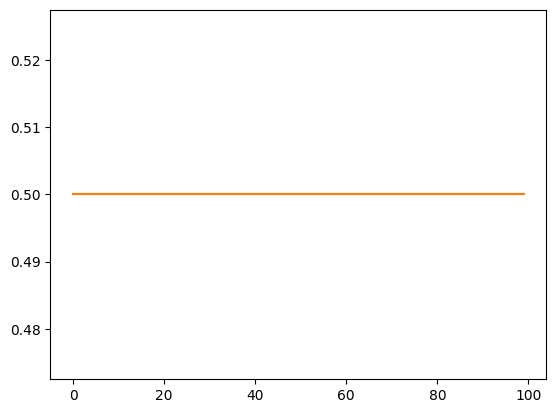

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 918us/step


<Axes: >

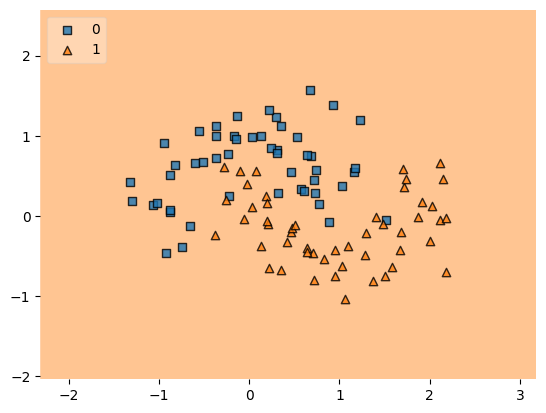

In [55]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)